In [ ]:
import numpy as np
import pandas as pd
# numpy, pandas: 데이터 처리
import matplotlib.pyplot as plt
# matplotlib.pyplot: 시각화

import torch
import torch.nn as nn
import torch.optim as optim
# PyTorch 딥러닝 프레임워크

from tqdm.notebook import tqdm_notebook
# tqdm.notebook: 학습 과정을 보기 좋게 진행 바 형식으로 표시

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Colab에서 Google 드라이브 파일 접근

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def show(img): ##visualize your image
    plt.imshow(img[1:].reshape(28, 28), cmap='gray')
    # 첫 번째 값(label)을 제외한 픽셀만 사용
    # 784개 픽셀을 28x28 이미지로 변환
    plt.show()

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/mnist_train.csv')
# MNIST 학습 데이터 CSV 파일을 로드
pxl = ["pxl{}".format(i) for i in range(len(df.columns)-1)]
df.columns = ["value"] + pxl
#df.rename(columns = {"5":"value"}, inplace = True)
# 첫 번째 열은 숫자(label), 나머지 784개 열은 픽셀 데이터
# 컬럼 이름을 value, pxl0~pxl783으로 지정

In [ ]:
df.head(10)
# 처음 10개 행 확인

,value,pxl0,pxl1,pxl2,pxl3,pxl4,pxl5,pxl6,pxl7,pxl8,...,pxl774,pxl775,pxl776,pxl777,pxl778,pxl779,pxl780,pxl781,pxl782,pxl783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


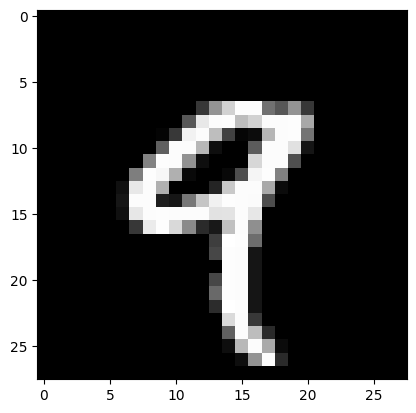

In [ ]:
show(df.iloc[3].values) #visualize 3rd dataset (hand writing image)
# 3번째 샘플 이미지를 출력 (정답 숫자도 함께 포함됨)

In [ ]:
A = pd.DataFrame(df, columns = pxl).values
# 이미지 데이터만 추출
y_data = pd.DataFrame(df, columns = ["value"]).values
# 정답 라벨만 추출

In [ ]:
def digit_to_vec(value):
  vec = np.zeros(shape = 10)
  vec[value] = 1
  return vec
# 정답 숫자를 One-hot 벡터로 변환하는 함수

In [ ]:
y_data_vec = [digit_to_vec(y_data[k]) for k in range(len(y_data))]
B = np.array(y_data_vec)
# y_data를 One-hot encoding으로 변환 → B

In [ ]:
class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__()
        self.linear1 = nn.Linear(784, 64)
        self.linear2 = nn.Linear(64, 32)
        self.linear3 = nn.Linear(32, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        x = self.softmax(x)
        return x
    # 입력층: 784개 입력
    # 은닉층 1: 64개 → ReLU
    # 은닉층 2: 32개 → ReLU
    # 출력층: 10개 (숫자 0~9) → softmax로 확률화

In [73]:
model = FCNN()

In [ ]:
x = torch.tensor(A, dtype=torch.float32)
y = torch.tensor(B, dtype=torch.float32)
# 모델 생성
# NumPy 배열을 torch.Tensor로 변환 (float32)

In [ ]:
model(x).shape

torch.Size([59999, 10])

In [ ]:
x.shape
# 모델 출력과 입력 형태 확인 (디버깅 용도)

torch.Size([59999, 784])

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)
# 옵티마이저: Adam
loss_fn = nn.MSELoss()
# 손실 함수: 평균 제곱 오차 (MSE, 분류에는 적절치 않지만 실험용으로 사용됨)
num_epochs = 1000
# 1000번 반복 학습

In [ ]:
for epoch in tqdm_notebook(range(num_epochs)):
    model.train()

    # Forward
    output = model(x)
    loss = loss_fn(output, y)

    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
      print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {loss.item():.4f}")
      # 매 10회마다 현재 손실 출력
      # model.train() → 학습 모드 (dropout, batch norm 등 적용 시)

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [1/1000] Loss: 0.0052
Epoch [11/1000] Loss: 0.0061
Epoch [21/1000] Loss: 0.0046
Epoch [31/1000] Loss: 0.0040
Epoch [41/1000] Loss: 0.0035
Epoch [51/1000] Loss: 0.0031
Epoch [61/1000] Loss: 0.0028
Epoch [71/1000] Loss: 0.0026
Epoch [81/1000] Loss: 0.0024
Epoch [91/1000] Loss: 0.0022
Epoch [101/1000] Loss: 0.0021
Epoch [111/1000] Loss: 0.0019
Epoch [121/1000] Loss: 0.0018
Epoch [131/1000] Loss: 0.0017
Epoch [141/1000] Loss: 0.0017
Epoch [151/1000] Loss: 0.0016
Epoch [161/1000] Loss: 0.0015
Epoch [171/1000] Loss: 0.0014
Epoch [181/1000] Loss: 0.0014
Epoch [191/1000] Loss: 0.0013
Epoch [201/1000] Loss: 0.0013
Epoch [211/1000] Loss: 0.0012
Epoch [221/1000] Loss: 0.0012
Epoch [231/1000] Loss: 0.0011
Epoch [241/1000] Loss: 0.0011
Epoch [251/1000] Loss: 0.0011
Epoch [261/1000] Loss: 0.0011
Epoch [271/1000] Loss: 0.0010
Epoch [281/1000] Loss: 0.0010
Epoch [291/1000] Loss: 0.0010
Epoch [301/1000] Loss: 0.0010
Epoch [311/1000] Loss: 0.0010
Epoch [321/1000] Loss: 0.0010
Epoch [331/1000] Loss

KeyboardInterrupt: 

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/mnist_test.csv')
pxl = ["pxl{}".format(i) for i in range(len(df.columns)-1)]
df2.columns = ["value"] + pxl
# 테스트 데이터 불러오기
# 컬럼명을 학습 데이터와 동일하게 맞춤
A2 = pd.DataFrame(df2, columns = pxl).values
x_test = torch.tensor(A2, dtype=torch.float32)

y_data2 = pd.DataFrame(df2, columns = ["value"]).values
y_data2 = y_data2.reshape(-1)
# 테스트용 입력/정답 데이터 분리 및 변환
# reshape(-1)로 라벨 벡터를 1차원으로 평탄화

In [ ]:
model.eval()
# 평가 모드로 전환
y_pred = model(x_test).detach().cpu().numpy()
y_pred = np.argmax(y_pred,axis=1)
# 예측값을 NumPy로 변환 후 가장 확률 높은 클래스를 선택

In [87]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [88]:
y_data2

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
(y_pred == y_data2).sum() / len(y_data2)
# 예측 결과와 실제 정답 비교
# 정확도 계산 (정답 개수 / 전체 개수)

np.float64(0.9628)